# Crawling

web crawler: 웹 페이지의 데이터를 모아주는 소프트웨어</br>
web crawling : 크롤러를 사용해 웹 페이지의 데이터를 추출해 내는 행위

# requests

requests는 python용 HTTP 라이브러리</br>
Crawling 과정에서 requests모듈을 이용해 웹 사이트의 소스코드를 가져온 다음 파싱을 하는 경우가 많다

HTTP 요청 메서드(HTTP request method): 클라이언트가 서버에게 요청하는 목적 및 그 종류를 알리는 수단 (request을 보내면 response를 객체로 받는다)<br>
이 chapter에서는 crawling이 목적이기 때문에, 데이터 요청 외 메서드(put, head, patch, delete, options)는 다루지 않는다
- get: requests.get(url, params, **kwargs)
    - params: HTTP 요청을 할 때 쿼리 스트링(query string)을 통해 응답받을 데이터를 필터링 (url에서 추출하고자 하는 class와 값 지정)

    ```python
        test_response = requests.get("https://jsonplaceholder.typicode.com/posts", params = {'user_Id': 1})
        test_response.json()
        """
        [{'userId': 1,
          'id': 1,
          'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
          'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}]
        """
    ```

- post: requests.post(url, data=None, json=None, \*\*kwargs)
    - data: get의 params와 같은 역할
    - json: HTTP 요청 바디에 JSON데이터를 전송하기 위한 인자
- status_code: 온라인 서비스를 HTTP로 호출하면 상태를 응답받고, 이 상태를 통해 요청이 잘 처리됐는지 판단한다
    - 200: 정상
    - 404: 페이지를 찾을 수 없음

>requests로 클라이언트에 요청을 보내면 status(응답 성공 or 실패 코드)와 데이터를 반환받는다

---
HTTP 요청의 응답으로 가져온 웹 사이트의 소스코드를 출력하는 형태
- text
- content (binary)
- json()
- headers: 응답에 대한 메타 데이터를 담고 있는 응답 헤더를 딕셔너리 형태로 반환

```
GET vs POST

get 메서드는 URL에 파라미터를 추가하여 서버에 GET 요청을 보내는 함수이고, post 메서드는 서버에 POST 요청(주로 서버에 데이터를 제출하기 위해 사용)을 보내는 함수이다
쉽게 말해, get 요청은 URL에 파라미터 정보가 포함되어 있고, post 요쳥은 URL에 파라미터 정보(민감 정보)가 포함되어 있지 않다

GET 요청은 데이터를 전송하는 바디가 필요하지 않고, URL에 파라미터를 추가하여 전송한다
GET 요청은 주로 웹 브라우저에서 링크를 클릭하여 페이지를 요청하거나, 검색어를 입력하여 검색 결과를 요청할 때 사용한다
GET 요청은 캐시를 사용하여 이미 조회된 데이터를 재사용할 수 있어서 반복적인 요청에서 유리하다

POST 요청은 데이터를 전송하는 바디가 필요하며, 데이터(민감 정보)는 요청 바디에 추가된다
POST 요청은 주로 로그인 페이지에서 사용자 이름과 비밀번호를 입력하고 제출할 때, 또는 회원 가입 페이지에서 회원 정보를 입력하고 제출할 때 사용한다
POST 요청은 요청 바디에 보안이 필요한 데이터를 추가할 수 있어서 보안이 중요한 작업에서 사용한다
```

In [10]:
import requests
import json

In [13]:
url = 'http://www.paullab.co.kr/stock.html'
html = requests.get(url)

if html.status_code == requests.codes.ok:
    text = html.text

# BeautifulSoup

HTML과 XML파일에서 데이터를 추출하는 라이브러리

**parsing**

>언어학에서 parsing은 구문 분석이라고도하며 문장을 그것을 이루고 있는 구성 성분으로 분해하고 그들 사이의 위계 관계를 분석하여 문장의 구조를 결정하는 것이다

parsing은 일련의 문자열을 의미있는 token(어휘 분석의 단위) 으로 분해하고 그것들로 이루어진 Parse tree를 만드는 과정으로,</br>

***데이터를 조립해 원하는 형태로 만드는 것을 의미***한다

**BeautifulSoup의 기본 구조**
```python
BeautifulSoup(markup, features, from_encoding, exclude_encodings, **kwargs)
```
- markup: HTML을 구성하는 언어로, 클라이언트의 요청에 대한 서버의 응답으로 생성된 requests객체를 입력한다
- features: parser 지정, 'lxml', 'lxml-xml', 'html.parser', 'html5lib', 'html', 'xml' 등
- from_encoding: 인코딩 종류 지정
- exclude_encodings: 제외할 인코딩 지정, 인코딩 타입을 정확히 할지는 못할 때 확실히 아닌 인코딩을 지정해서 제외한다
- \*\*kwargs: Beautiful Soup 4 사용자를 위해 변경된 명령어를 알려준다 ('convertEntities', 'markupMessage' 등)

In [27]:
from bs4 import BeautifulSoup

In [14]:
soup = BeautifulSoup(text, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<title>Document</title>
<link href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" rel="stylesheet" type="text/css"/>
<style>
    h1{
      margin: 2rem;
    }
    h1>span{
      font-size: 1rem;
    }
    .main {
      width: 80%;
      margin: 0 auto;
      text-align: center;
    }

    table {
      width: 100%;
    }

    a {
      color: inherit;
      cursor: pointer;
      text-decoration: none;
    }

    a:hover {
      color: #000;
      text-decoration: none;
    }

    em {
      font: inherit;
    }

    #information {
      padding: 15px;
      margin-bottom: 50p

In [23]:
soup.title # soup.find('title')

<title>Document</title>

In [21]:
soup.title.string # soup.title.text : tag의 value 추출

'Document'

In [22]:
soup.table # table tag 추출, tr: 1개 행을 생성하는 tag, th: tr의 행을 구성하는 1개의 열의 속성 이름, td: tr행의 1개 열의 값

<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>

## BeautifulSoup method

requests객체를 parsing한 BeautifulSoup객체에서 태그를 추출하려면 메서드를 이용해야 한다

- find
- find_all
- select
- select_one('태그 경로 문자열'): 지정한 규칙에 일치하는 tag 중 가장 먼저 만난 tag 한 개를 반환

https://www.crummy.com/software/BeautifulSoup/bs4/doc.ko/

<태그 속성='값'></태그>
id = 'stock': 페이지 당 하나(key, 페이지의 고유값) -> selector -> find
class='2022': 페이지(html 파일) 당 ->selector(선택자) -> find_all

### find

```python
find(name, attrs, recursive, string, **kwargs)
```

- 가장 먼저 만나는 조건과 일치하는 태그 1개 추출
- chaining을 통해 하위 태그로 접근할 수 있다

In [30]:
soup.find(id = 'update')

<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>

In [33]:
tag = soup.find(id = 'update')
dir(tag) # 사용할 수 있는 메서드 반환

['DEFAULT_INTERESTING_STRING_TYPES',
 'EMPTY_ELEMENT_EVENT',
 'END_ELEMENT_EVENT',
 'START_ELEMENT_EVENT',
 'STRING_ELEMENT_EVENT',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_clone',
 '_event_stream',
 '_find_all',
 '_find_one',
 '_format_tag',
 '_indent_string',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_namespaces',
 '_should_pretty_print',
 'append',
 'attrs',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'chi

In [34]:
tag.name # id='update'인 tag는 <span></span>

'span'

In [49]:
test = soup.find('table')
test.attrs

{'summary': '시가총액 정보', 'class': ['border-style']}

### find_all

```python
find_all(name, attrs, recursive, string, **kwargs)
```
- 지정 태그 모두 추출 (list 객체 반환)

하위 tag를 찾으려면, find_all 메서드가 반환한 리스트에서 원하는 tag를 추출하고</br>
find or find_all or select or select_one 메서드를 이용한다

In [26]:
soup.find_all('table')

[<table class="border-style" summary="시가총액 정보">
 <tr>
 <th class="strong" scope="row">시가총액</th>
 <!-- 공백은 의도적으로 넣은 것입니다. -->
 <td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
 </tr>
 <tr>
 <th scope="row">
 <a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
 </th>
 <!-- 공백은 의도적으로 넣은 것입니다. -->
 <td>위니브월드 <em id="_market_sum">1</em>위</td>
 </tr>
 <tr>
 <th scope="row">상장주식수</th>
 <!-- 공백은 의도적으로 넣은 것입니다. -->
 <td><em id="_market_sum">5,969,782,550</em></td>
 </tr>
 </table>,
 <table class="border-style" summary="업종상세 정보">
 <tr>
 <th class="strong" scope="row">현재가</th>
 <td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
 </tr>
 <tr>
 <th scope="row">52주 최고 <span class="bar">l</span> 최저</th>
 <td>
 <em>62,800</em>
 <span class="bar">l</span>
 <em>42,300</em>
 </td>
 </tr>
 <tr>
 <th scope="row">배당수익률 <span class="bar">l</span><span> 2019.12</span>
 <a alt="배당수익률 상세설명" class="help" href="#"><em>?</em></a>
 <div class="lyr_section" style="disp

In [31]:
soup.find_all('table', class_='table') # class는 예약어이기 때문에, class를 호출할 떄는 class_ 사용

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

### select

```python
select('태그 경로 문자열')
```
지정한 규칙에 일치하는 태그들을 모두 반환
- tag: 지정한 tag를 반환한다
- tag.class: 지정한 class명을 가진 tag를 반환한다
- \"\#\": tag의 id
- \"\.\": tag의 class
- \>: 태그의 상하위 관계를 표현한다
- [attr_name="attr"]: 지정한 속성을 가진 tag를 반환한다
    - 속성의 값이 특정 값과 정확히 일치하는 경우: =
    - 특정 값으로 시작하는 경우: ^=
    - 특정 값으로 끝나는 경우: $=
    - 특정 값을 포함하는 경우: *=
    - 특정 값을 포함하지 않는 경우: !=

In [51]:
soup.select('#update') # "#": id

[<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>]

In [53]:
soup.select('.table') # '.': class

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

In [54]:
# <table> <tbody> <tr> ... </tr> </tbody> </table>
# <table> > <tbody>
soup.select('.table > tbody') # 한 번의 select 메서드 구문에서 html 구조에서 하위 tag에 접근할 때, 순서에 맞게 접근해야 한다.(중간을 생략할 수 없음 -> 생략하면 비어있는 list 반환)

[<tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,8

In [55]:
soup.select('.table > tbody > tr > th') # class = 'table'인 tag, tbody tag, tr tag, th tag 구조를 갖는 th tag를 list로 반환

[<th scope="col">날짜</th>,
 <th scope="col">종가</th>,
 <th scope="col">전일비</th>,
 <th scope="col">시가</th>,
 <th scope="col">고가</th>,
 <th scope="col">저가</th>,
 <th scope="col">거래량</th>,
 <th scope="col">날짜</th>,
 <th scope="col">종가</th>,
 <th scope="col">전일비</th>,
 <th scope="col">시가</th>,
 <th scope="col">고가</th>,
 <th scope="col">저가</th>,
 <th scope="col">거래량</th>,
 <th scope="col">날짜</th>,
 <th scope="col">종가</th>,
 <th scope="col">전일비</th>,
 <th scope="col">시가</th>,
 <th scope="col">고가</th>,
 <th scope="col">저가</th>,
 <th scope="col">거래량</th>,
 <th scope="col">날짜</th>,
 <th scope="col">종가</th>,
 <th scope="col">전일비</th>,
 <th scope="col">시가</th>,
 <th scope="col">고가</th>,
 <th scope="col">저가</th>,
 <th scope="col">거래량</th>]

In [56]:
one = soup.select('.main')[2]
one # div > h2 > h3 > table

<div class="main">
<h2 id="제주코딩베이스캠프연구원">제주코딩베이스캠프 연구원</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class

In [58]:
two = one.select('tbody > tr')
two

[<tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>,
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>,
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,830</spa

# 동적 페이지

**정적 페이지**는 인터넷에 접속하면 페이지의 모든 정보가 업로드 된다</br>
html을 불러오면 추가 작업 없이 그 안에 모든 데이터를 추출할 수 있다

**동적 페이지**는 페이지 내에서 사용자가 특정한 동작을 하면 추가적인 정보가 업데이트 된다. 단, 이 때 url이 변경되지 않는다</br>
(특정 동작은 클릭, 스크롤, 로그인 등의 동작을 말한다)

ex. 네이버 다음 등 웹사이트의 배너, 인기 검색어, SNS 피드 등

동적 페이지에서 데이터를 추출하기 위해서는 추출하고자 하는 데이터의 html이 갱신되는데 필요한 동작을 실행시켜줘야 한다</br>
파이썬을 통해 동작을 자동으로 실행 시키기 위해서는 2가지, 동작 자동화 주문 셀레니움과 웹 제어도구 웹 드라이버가 필요하다 (셀리네움으로 동작을 지시하면 웹 드라이버에서 동작을 수행하는 것)

이 chapter에서 셀레니움은 다루지 않는다

https://charimlab.tistory.com/entry/ep01%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81-11-%EB%8F%99%EC%A0%81-%ED%8E%98%EC%9D%B4%EC%A7%80%EC%9B%B9-%EB%8F%99%EC%9E%91-%EC%9E%90%EB%8F%99%ED%99%94Selenium-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC

## 네이버 홈페이지에서 웹툰 배너의 인기급상승 웹툰 크롤링

네이버는 웹툰 배너를 클릭하면 화면에 출력되는 정보는 업데이트 되지만, URL은 변하지 않는 동적 페이지이다

아래 코드는 해당 배너의 URL에 request를 보내 crawling하는 예시이다

In [344]:
url = 'https://www.naver.com/nvhaproxy/v1/panels/BBOOM/html'
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
   ,'referer':'https://datalab.naver.com/'
}

response = requests.get(url)

if response.status_code == requests.codes.ok:
    print('접속성공')
    soup = BeautifulSoup(response.text, 'html.parser')

접속성공


In [284]:
response

<Response [200]>

In [208]:
soup

<div class="group_topstory" data-block-code="PC-THEME-BBOOM-EDIT-AREA" data-block-id="645cb11f5cea28d2db1df63b" data-block-type="BLOCKS" data-da="margin-top" data-template-code="PC-THEMECAST-EDIT-AREA">
<div class="topstory_inner" data-block-code="PC-THEME-BBOOM-EDIT-AREA-ITEM" data-block-id="645ca8d97dd28a7aefb4c12d" data-block-type="A-MATERIAL" data-template-code="IMAGE1">
<div class="topstory_view">
<a class="topstory_thumb" data-clk="tcc_web.editbigimg1" href="https://comic.naver.com/webtoon/detail?titleId=783540&amp;no=58" target="_blank">
<img alt="휴재 복귀 &lt;여름여자 하보이&gt; 최신화 보러가기" data-src="https://s.pstatic.net/static/www/mobile/edit/20230511/cropImg_728x360_125734535543999606.png" height="180" onerror="this.outerHTML='&lt;span class=\'pm_noimg\'&gt;&lt;span class=\'noimg_text\'&gt;이미지 준비중&lt;/span&gt;&lt;/span&gt;'" src="https://s.pstatic.net/static/www/mobile/edit/20230511/cropImg_728x360_125734535543999606.png" width="364"/>
<span class="thumb_bd"></span>
</a>
<a class="topst

In [343]:
results = soup.select('a.chart_area[data-clk^="tcc_web.hottab1cont"]>div.chart_info>div.info_box>strong.title')

lst = []

for result in results:
    lst.append(result.get_text())
        
print(lst)

['외모지상주의', '역대급 영지 설계사', '광마회귀', '나 혼자 만렙 뉴비', '죽지 않으려면', '재혼 황후', '어쩌다보니 천생연분', '1초', '나노마신', '언니, 이번 생엔 내가 왕비야']


### 네이버 url에서 crawling 예시 코드

In [351]:
url = "https://www.naver.com/"
while 1:
    response = requests.get(url)
    data = BeautifulSoup(response.text, 'html.parser')
    try:
        if re.findall(r'true', str(data.find('a', {"class":"_NM_THEME_CATE tab id_bboom"})))[0] == 'true':
            break
    except IndexError:
        pass

toon_top_10 = data.findAll("div", {"class" : "chart_view_wrap type_webtoon"})[0]
toon_lst = toon_top_10.findAll("strong", "title")
toon_rank = ["{0}. ".format(i+1) + toon_lst[i].get_text() for i in range(len(toon_lst))]   
toon_rank

['1. 외모지상주의',
 '2. 역대급 영지 설계사',
 '3. 광마회귀',
 '4. 나 혼자 만렙 뉴비',
 '5. 재혼 황후',
 '6. 택배기사',
 '7. 죽지 않으려면',
 '8. 어쩌다보니 천생연분',
 '9. 언니, 이번 생엔 내가 왕비야',
 '10. 물위의 우리']

## 네이버 실시간 급상승 검색어 크롤링

크롤링 막은 사이트 접속 권한(headers) 설정</br>
https://luminitworld.tistory.com/88

In [307]:
from datetime import datetime
import json

headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
   ,'referer':'https://datalab.naver.com/'
}
url = "https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000001"

response = requests.post(url, headers = headers)

if response.status_code == requests.codes.ok:
    print('접속성공')

접속성공


In [305]:
# json 형태
response.text[:500]

'[{"message":null,"statusCode":200,"returnCode":0,"date":"2023/04/29","datetime":"2023.04.29.(토)","range":"","ranks":[{"rank":1,"keyword":"크록스","linkId":"크록스"},{"rank":2,"keyword":"나이키운동화","linkId":"나이키운동화"},{"rank":3,"keyword":"캐리어","linkId":"캐리어"},{"rank":4,"keyword":"운동화","linkId":"운동화"},{"rank":5,"keyword":"에코백","linkId":"에코백"},{"rank":6,"keyword":"거꾸로우산","linkId":"거꾸로우산"},{"rank":7,"keyword":"크로스백","linkId":"크로스백"},{"rank":8,"keyword":"안전화","linkId":"안전화"},{"rank":9,"keyword":"레인부츠","linkId"'

In [341]:
# json 형태로 변경
data = json.loads(response.text)
data[0]

{'message': None,
 'statusCode': 200,
 'returnCode': 0,
 'date': '2023/04/29',
 'datetime': '2023.04.29.(토)',
 'range': '',
 'ranks': [{'rank': 1, 'keyword': '크록스', 'linkId': '크록스'},
  {'rank': 2, 'keyword': '나이키운동화', 'linkId': '나이키운동화'},
  {'rank': 3, 'keyword': '캐리어', 'linkId': '캐리어'},
  {'rank': 4, 'keyword': '운동화', 'linkId': '운동화'},
  {'rank': 5, 'keyword': '에코백', 'linkId': '에코백'},
  {'rank': 6, 'keyword': '거꾸로우산', 'linkId': '거꾸로우산'},
  {'rank': 7, 'keyword': '크로스백', 'linkId': '크로스백'},
  {'rank': 8, 'keyword': '안전화', 'linkId': '안전화'},
  {'rank': 9, 'keyword': '레인부츠', 'linkId': '레인부츠'},
  {'rank': 10, 'keyword': '루이비통가방', 'linkId': '루이비통가방'}]}

In [340]:
for i in data:
    print(datetime.strptime(i['datetime'][:-4], '%Y.%m.%d').strftime('%Y년 %m월 %d일의 패션잡화 검색어 순위입니다.\n'))

    for rank in i['ranks']:
        print(f"{rank['rank']}위 {rank['keyword']}")
    print()

2023년 04월 29일의 패션잡화 검색어 순위입니다.

1위 크록스
2위 나이키운동화
3위 캐리어
4위 운동화
5위 에코백
6위 거꾸로우산
7위 크로스백
8위 안전화
9위 레인부츠
10위 루이비통가방

2023년 04월 30일의 패션잡화 검색어 순위입니다.

1위 크록스
2위 나이키운동화
3위 캐리어
4위 운동화
5위 크로스백
6위 에코백
7위 슬리퍼
8위 아디다스운동화
9위 백팩
10위 안전화

2023년 05월 01일의 패션잡화 검색어 순위입니다.

1위 크록스
2위 나이키운동화
3위 캐리어
4위 운동화
5위 레인부츠
6위 크로스백
7위 에코백
8위 아디다스운동화
9위 슬리퍼
10위 지비츠

2023년 05월 02일의 패션잡화 검색어 순위입니다.

1위 크록스
2위 나이키운동화
3위 캐리어
4위 레인부츠
5위 운동화
6위 에코백
7위 슬리퍼
8위 크로스백
9위 카드지갑
10위 지비츠

2023년 05월 03일의 패션잡화 검색어 순위입니다.

1위 크록스
2위 레인부츠
3위 나이키운동화
4위 캐리어
5위 운동화
6위 슬리퍼
7위 에코백
8위 크로스백
9위 안전화
10위 양산

2023년 05월 04일의 패션잡화 검색어 순위입니다.

1위 크록스
2위 레인부츠
3위 나이키운동화
4위 헌터레인부츠
5위 캐리어
6위 운동화
7위 슬리퍼
8위 에코백
9위 크로스백
10위 장화

2023년 05월 05일의 패션잡화 검색어 순위입니다.

1위 레인부츠
2위 크록스
3위 헌터레인부츠
4위 아디다스노라
5위 나이키운동화
6위 락피쉬레인부츠
7위 장화
8위 캐리어
9위 운동화
10위 우산

2023년 05월 06일의 패션잡화 검색어 순위입니다.

1위 레인부츠
2위 크록스
3위 헌터레인부츠
4위 아디다스노라
5위 락피쉬레인부츠
6위 장화
7위 나이키운동화
8위 캐리어
9위 운동화
10위 우산

2023년 05월 07일의 패션잡화 검색어 순위입니다.

1위 크록스
2위 레인부츠
3위 나이키운동화
4위 헌터레인부츠
5위 락피쉬레인부츠
6위 캐리어
7위 운동화
8위 장화
9위 

# FinanceDataReader

- 주식 가격, 지수, 환율, 암호 화폐 가격 등 주식 데이터 크롤링
- 시계열 데이터 수집
- 거래소별, 종목(코드)별, 단축(코드)별 데이터 수집 가능

In [60]:
import FinanceDataReader as fdr

In [73]:
# fdr 라이브러리의 데이터
# 주식 지수에 대한 주가 데이터 웹 스크래핑
df_krx = fdr.StockListing('krx') # krx, KOSPI, KOSDAQ, NASDAQ, NYSE(뉴욕증권거래소), S&P500 등
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70300,1,1500,2.18,69800,70400,69500,14684173,1028497591450,419675713265000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,578000,2,-5000,-0.86,580000,583000,575000,71871,41630961000,135252000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,109100,1,5600,5.41,107500,109700,106100,6800029,732069113400,79425058021500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,778000,2,-1000,-0.13,778000,782000,773000,13814,10746963000,55373372000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,702000,2,-10000,-1.40,708000,716000,697000,95021,67101783000,49555824786000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1799,0,0,0.00,0,0,0,0,0,2842348040,1579960,KNX
2713,000547,KR7000542001,흥국화재2우B,KOSPI,,17190,1,90,0.53,16980,17190,16980,61,1035990,2640384000,153600,STK
2714,288490,KR7288490006,나라소프트,KONEX,일반기업부,59,2,-1,-1.67,63,63,55,125649,7267526,2250673000,38147000,KNX
2715,322190,KR7322190000,베른,KONEX,일반기업부,150,1,10,7.14,150,150,150,1,150,1338779550,8925197,KNX


In [63]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2717 non-null   object 
 1   ISU_CD       2717 non-null   object 
 2   Name         2717 non-null   object 
 3   Market       2717 non-null   object 
 4   Dept         2717 non-null   object 
 5   Close        2717 non-null   object 
 6   ChangeCode   2717 non-null   object 
 7   Changes      2717 non-null   int64  
 8   ChagesRatio  2717 non-null   float64
 9   Open         2717 non-null   int64  
 10  High         2717 non-null   int64  
 11  Low          2717 non-null   int64  
 12  Volume       2717 non-null   int64  
 13  Amount       2717 non-null   int64  
 14  Marcap       2717 non-null   int64  
 15  Stocks       2717 non-null   int64  
 16  MarketId     2717 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 361.0+ KB


In [64]:
df_krx.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2.717000e+03,2.717000e+03,2.717000e+03,2.717000e+03
mean,-110.665808,-0.476805,20853.210894,21091.688627,20538.247332,4.579163e+05,4.390682e+09,8.971038e+11,4.186701e+07
std,916.958853,2.752016,53295.045906,53749.793032,52639.923828,2.499245e+06,2.846790e+10,9.074906e+12,1.343060e+08
min,-22000.000000,-15.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.216000e+09,1.098520e+05
25%,-120.000000,-1.500000,2865.000000,2900.000000,2800.000000,1.126300e+04,7.418895e+07,6.271113e+10,1.001394e+07
50%,-30.000000,-0.580000,6780.000000,6920.000000,6650.000000,4.736300e+04,3.059419e+08,1.259780e+11,1.954779e+07
75%,0.000000,0.000000,16880.000000,17200.000000,16580.000000,1.688040e+05,1.504603e+09,3.018474e+11,4.123263e+07
max,11500.000000,30.000000,778000.000000,782000.000000,773000.000000,6.684115e+07,1.028498e+12,4.196757e+14,5.969783e+09


특정 회사의 지정한 기간의 주식 거래 정보 출력

In [66]:
# fdr.DataReader('Code', 'start', 'end', 'exchange')
'''
Symbol:
    종목(회사) 코드
    환율 (ex. USD 기준화폐/KRW 대상화폐) (가상화폐: BTC, ETH)

Start(str):
    조회하고 싶은 시작 지점 설정 (연도, 연도-월, 연도-월-일)

End(str):
    조회하고 싶은 마지막 지점 설정

Exchange:
    상장 폐지된 종목, 예를 들어, krx지수의 상장폐지 종목을 조회하려면 krx-delisting()
'''

samsung_df = fdr.DataReader('005930')
samsung_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-10,1653,1675,1604,1634,664282,NaN
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219
1999-02-18,1712,1721,1682,1687,440930,-0.032129
1999-02-19,1663,1663,1602,1653,503847,-0.020154


In [74]:
samsung_df_2022_ = fdr.DataReader('005930', '2022') # 2022 - 현재
samsung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [70]:
samsung_df_2022 = fdr.DataReader('005930', '2022', '2023') # 2022년
samsung_df_2022.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454
2022-12-28,57600,57600,56400,56600,14665410,-0.025818
2022-12-29,56000,56200,55300,55300,11295935,-0.022968


상장 폐지 종목 데이터

In [72]:
del_stock = fdr.DataReader('003497', exchange = 'krx-delisting') # 003497 상장 폐지된 종목: krx에 데이터가 없음 / krx-delisting(exchange) 으로 조회
del_stock

,Date,Code,Name,Market,SecuGroup,Close,UpDown,Change,ChangeRate,Open,High,Lower,Volume,Amount,MarCap
0,2001-04-13,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
1,2001-04-12,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
2,2001-04-11,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
3,2001-04-10,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
4,2001-04-09,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1998-04-30,003497,대한항공(2우B),KOSPI,주권,1915,1,5,0.26,1915,1915,1915,110,210650,660282425
754,1998-04-29,003497,대한항공(2우B),KOSPI,주권,1910,2,-95,-4.74,1910,1910,1910,430,821300,658558450
755,1998-04-28,003497,대한항공(2우B),KOSPI,주권,2005,1,5,0.25,2005,2005,2005,100,200500,691313975
756,1998-04-27,003497,대한항공(2우B),KOSPI,주권,2000,1,90,4.71,1910,2000,1910,260,501100,689590000


시가 조회

<Axes: xlabel='Date'>

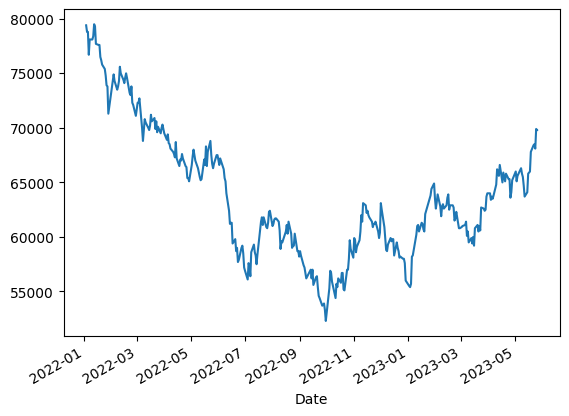

In [77]:
samsung_df_2022_.loc[:,'Open'].plot()

환율 데이터

In [78]:
ex_us_kw_df = fdr.DataReader('USD/KRW', '2023')
ex_us_kw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1260.910034,1273.930054,1256.550049,1260.910034,1260.910034,0
2023-01-03,1270.099976,1278.969971,1264.390015,1270.099976,1270.099976,0
2023-01-04,1279.079956,1279.719971,1267.560059,1279.079956,1279.079956,0
2023-01-05,1271.079956,1278.229980,1265.739990,1271.079956,1271.079956,0
2023-01-06,1274.180054,1274.180054,1253.010010,1274.180054,1274.180054,0
...,...,...,...,...,...,...
2023-05-22,1324.209961,1324.219971,1312.430054,1324.209961,1324.209961,0
2023-05-23,1313.829956,1321.729980,1308.260010,1313.829956,1313.829956,0
2023-05-24,1319.839966,1320.300049,1314.089966,1319.839966,1319.839966,0


<Axes: xlabel='Date'>

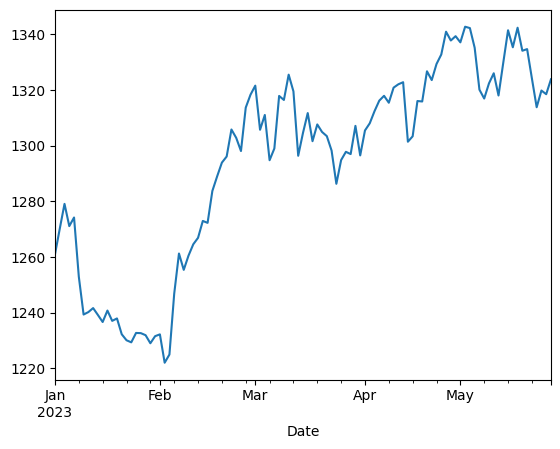

In [81]:
ex_us_kw_df.loc[:, 'Close'].plot()

<Axes: xlabel='Date'>

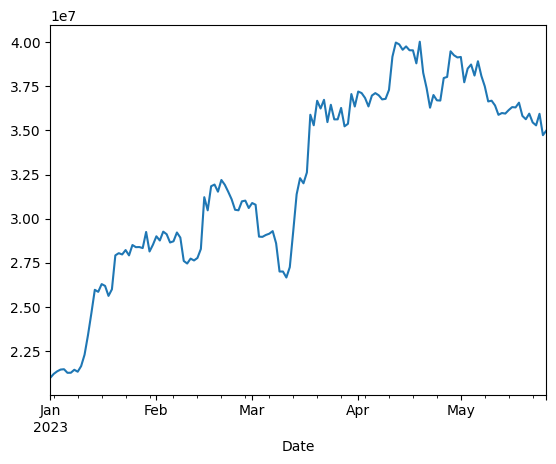

In [80]:
fdr.DataReader('BTC/KRW', '2023')['Close'].plot()

# 파일 데이터 크롤링 (코드는 참고만 하기)

## 한글(.hwp)파일 크롤링 후 엑셀로 변환

ole 라이브러리 사용
- hwp파일을 html과 같이 text로 불러온다

https://cdn.hancom.com/link/docs/%ED%95%9C%EA%B8%80%EB%AC%B8%EC%84%9C%ED%8C%8C%EC%9D%BC%ED%98%95%EC%8B%9D_5.0_revision1.2.pdf
http://www.terms.co.kr/OLE.htm
http://www.decalage.info/file_formats_security/office

In [82]:
# 경로 설정
dir_path = 'data_hwp/'

# 파일 이름 설정
hwp_name = '예제.hwp'

# 경로 + 파일
hwp_path = os.path.join(dir_path, hwp_name)

# 불러오기
f = ole.open(hwp_path)

content = f.get_stream('PrvText').read().decode('utf-16le')
print(content)

In [ ]:
# excel 파일로 변환하기

columns = ['Name', 'Company', 'Phone', 'e-mail', 'why', 'experience']

df = pd.DataFrame(columns=columns)


# 읽어온 값을 hwp 분리해서 딕셔너리
word_list = content.split('><')
target_list = ['성    명', '소    속', '연 락 처', 'E-mail', '주    소', '연 령 대']

info_dict = {} # 데이터 추출후 저장할 빈 딕셔너리

In [ ]:
# 데이터 프레임으로 만들기
for n, target in enumerate(target_list):
  info = word_list[word_list.index(target) + 1]
  info_dict[column[n]] = info

df = pd.DataFrame(data=info_dict, index=[0], columns=columns)
df

In [ ]:
# 엑셀 파일로 추출
df.to_exel('예제.xlsx')

## PDF

In [ ]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [ ]:
def pdf2txt(pdf_file):
    rsrcmgr = PDFResourceManager()
   
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(pdf_file, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,
                                 caching=caching, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    return text

In [ ]:
# pdf 파일 불러오기

import os
os.chdir('C:\workspace')
os.listdir('sample/')
pdf_path='sample/「인공지능 업무자동화교육」 참가신청서.pdf'

In [ ]:
text = pdf2txt(pdf_path)
text # text 파일로 변환해줌

# 연습문제

## 1. (주) 캣네생선의 왼쪽 이미지를 불러온 뒤, 상하, 좌우 반전한 이미지를 출력하세요

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from bs4 import BeautifulSoup
import pandas as pd
from io import BytesIO

url = "http://www.paullab.co.kr/stock.html"
data_tbl = pd.read_html(url)[3]

url = "https://paullab.co.kr/cats_stock.png"
res = requests.get(url)
img = np.asarray(Image.open(BytesIO(res.content)))

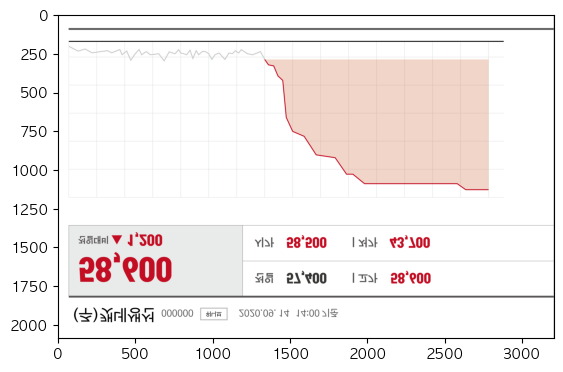

In [124]:
# 위아래 반전
plt.imshow(img[::-1])

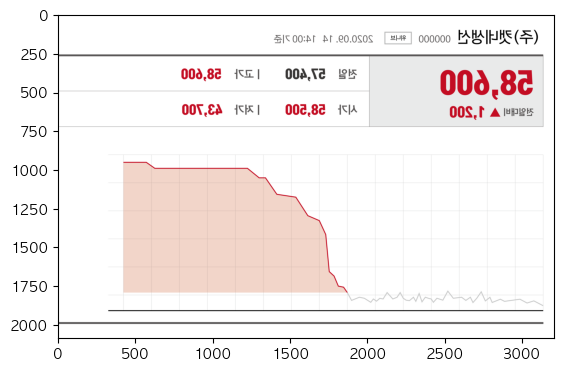

In [125]:
# 좌우 반전
plt.imshow(img[:, ::-1])

## 2. SK하이닉스의 2020년도 데이터를 출력하고 그 시가 데이터를 그래프로 출력하세요

In [112]:
def item_code_by_item_name(df, item_name):
    """
    종목명을 입력받아 
    코드를 출력하는 함수
    """
    item_code_list = df.loc[df['Name'] == item_name,'Code'].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    return False

In [113]:
import FinanceDataReader as fdr

def find_item_list(df, item_name, start=None, end=None):
    '''
    종목명을 입력받아 입력받은 기간 내 주가 정보를 출력하는 함수
    잘못된 종목명을 입력하면, item_code_by_item_name 함수에서 False를 반환받아,
    "잘못된 종목을 입력했습니다"를 출력합니다
    '''
    sym = item_code_by_item_name(df, item_name)

    if sym:
        if start and end:
            return fdr.DataReader(sym, str(start), str(end))
        elif start or end:
            if start:
                return fdr.DataReader(sym, start = str(start))
            else:
                return fdr.DataReader(sym, end = str(end))
        else:    
            return fdr.DataReader(sym)
    return "잘못된 종목을 입력했습니다" # False

In [121]:
df_krx = fdr.StockListing('krx')
df_sk = find_item_list(df_krx, "SK하이닉스", '2020', '2021')
df_sk

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,96000,96200,94100,94700,2342070,0.006376
2020-01-03,96500,97900,94300,94500,3021380,-0.002112
2020-01-06,93000,95300,92800,94300,2577573,-0.002116
2020-01-07,94500,95400,94000,94000,2489429,-0.003181
2020-01-08,96400,99500,95200,97400,7014748,0.036170
...,...,...,...,...,...,...
2020-12-23,113000,116000,112500,116000,3173156,0.031111
2020-12-24,116000,118500,115500,118000,3486636,0.017241
2020-12-28,119000,119500,115000,115500,4825132,-0.021186


<Axes: xlabel='Date'>

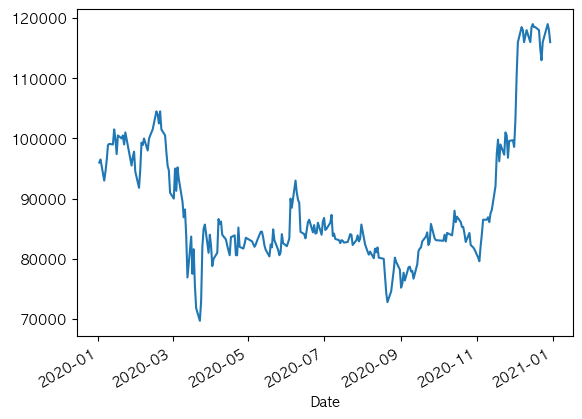

In [122]:
df_sk["Open"].plot()